# Visualización de datos con pandas/matplotlib

> La librería `pandas` se integra con `matplotlib` para permitir la visualización directa de Dataframes.
> A continuación veremos cómo generar distintos tipos de gráficos.

El primer paso es importar las librerías (pandas + librerías gráficas).

Igualmente configuraremos el cuaderno `jupyter` para mostrar los gráficos dentro de las celdas del cuaderno.
En este caso se permite el uso de "atajos" (_magic_), caracterizados por comenzar por el caracter `'%'`.


## Recordad: atajos de teclado
- `Ctrl + Enter`: ejecuta celda seleccionada
- `Mayúsculas + Enter`: ejecuta celda seleccionada y pasa a la siguiente
- `Alt + Enter`: ejecuta celda, inserta nueva y pasa a la siguiente

In [1]:
%matplotlib inline
# atajo `matplotlib` siempre antes de `import pandas`

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns  # opcional
from ipywidgets import interact

En este punto podemos, opcionalmente, establecer diferentes parámetros gráficos, como el [estilo](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html), tamaño por defecto de las imágenes, etc.

In [3]:
sns.set()
# De forma alternativa, sin seaborn:
# plt.style.use('ggplot')

plt.rcParams["figure.figsize"] = (10.0, 8.0)
plt.rcParams['font.family'] = ['monospace']

Dibujar directamente con `matplotlib` exige controlar cada uno de los detalles (color, etiquetas, título, ...)

## Ejemplo con `matplotlib`

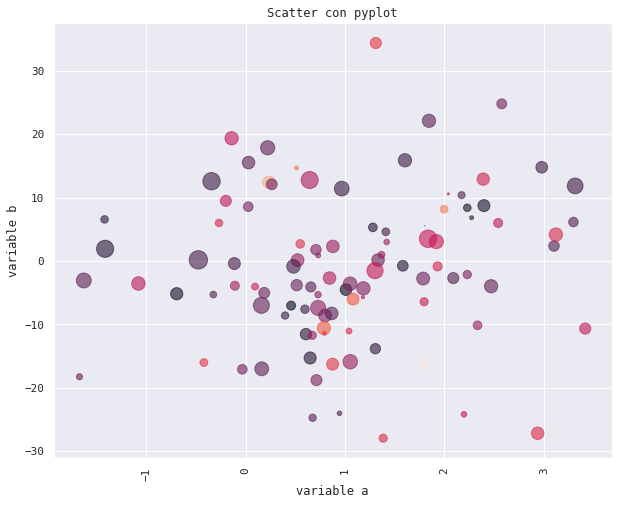

In [4]:
N = 100
np.random.seed(7384)

data = {'a': np.random.randn(N) + 1,
        'c': np.random.gamma(10, size=N),
        'd': np.random.randn(N) - 1}
data['b'] = data['a'] + 10 * np.random.randn(N)
data['d'] = np.abs(data['d']) * N

plt.scatter('a', 'b', s='d', c='c', data=data, alpha=0.6)
plt.xlabel('variable a')
plt.ylabel('variable b')
plt.xticks(rotation='vertical')
plt.title('Scatter con pyplot');

## Equivalente en `pandas`

True

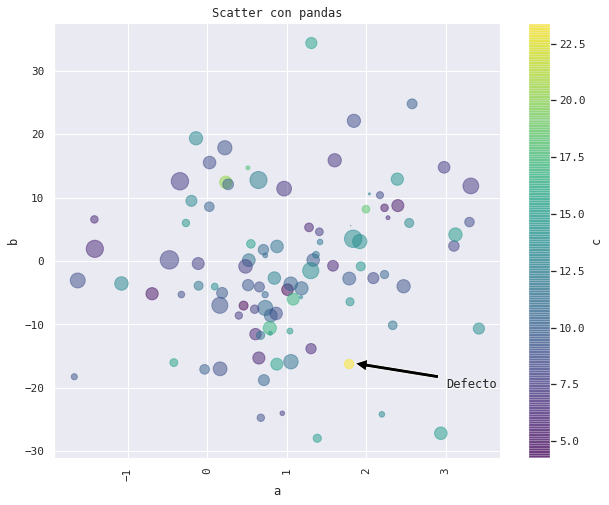

In [5]:
fig, ax = plt.subplots()

# Convertimos los datos anteriores a dataframe
df = pd.DataFrame.from_dict(data)

#####  Código equivalente con pandas
ax2 = df.plot.scatter(
    x='a', y='b',  # hacemos referencia a los nombres de las columnas en el dataframe
    c='c',  # columna con el color
    s=df['d'],  # s: tamaño
    colormap='viridis',  # gama de colores
    alpha=.5,  # nivel de transparencia de los puntos
    title='Scatter con pandas',  # título
    rot='vertical',  # rotación del texto en el eje x
    ax=ax  # dónde vamos a dibujar
)
#####


# Crea una anotación
ax.annotate(
    'Defecto', xy=(1.8, -16),
     xytext=(3, -20),
     arrowprops=dict(facecolor='black', shrink=0.05)
)

ax2 == ax

## Gráfico de barras

In [6]:
# Obtención de datos

origen_datos = 'http://www.ine.es/jaxi/files/_px/es/csv_sc/t20/e301/provi/03009.csv_sc'
# origen_datos = '03009sc.csv'

marriages = pd.read_csv(origen_datos,
                        sep=';', encoding='utf-8',
                        na_values='..',
                        header=[4, 5], index_col=0)[:-2]
marriages.drop(marriages.columns[-1], axis=1, inplace=True)

meses = marriages.columns.get_level_values(0)[0::5].values.repeat(5)
marriages.columns = pd.MultiIndex.from_tuples(zip(meses, marriages.columns.get_level_values(1)))
provincias = ['Cantabria', 'Madrid', 'Murcia', 'León', 'Albacete']


In [7]:
def plot_bar(tabla_resumen=True, leyenda=True, apilado=True, colores='Purples', titulo='',
             provincia_1=provincias[0], provincia_2=provincias[1],
             provincia_3=provincias[2], provincia_4=provincias[3]):
    data = marriages.Total.reindex([provincia_1, provincia_2, provincia_3, provincia_4])
    if apilado:  # eliminamos columna de datos totales
        data = data.drop('Total', axis=1)

    #####
    ax = data.plot.bar(
    #####
        stacked=apilado,     # apilar los datos de las columnas
        table=tabla_resumen, # añadir tabla con los datos
        title=titulo,
        legend=leyenda,
        cmap=colores
    )
    if tabla_resumen:
        ax.set_xticklabels([]);

In [8]:
cmaps = [cmap for cmap in plt.colormaps() if not cmap.endswith("_r")]
cmaps.sort()
provs = list(marriages.index.drop('Total'))
interact(plot_bar,
         tabla_resumen=True,
         apilado=True,
         leyenda=True,
         provincia_1=provs,
         provincia_2=provs,
         provincia_3=provs,
         provincia_4=provs,
         colores=cmaps,
         titulo='Número de matrimonios en 2017');

interactive(children=(Checkbox(value=True, description='tabla_resumen'), Checkbox(value=True, description='ley…

## Histograma

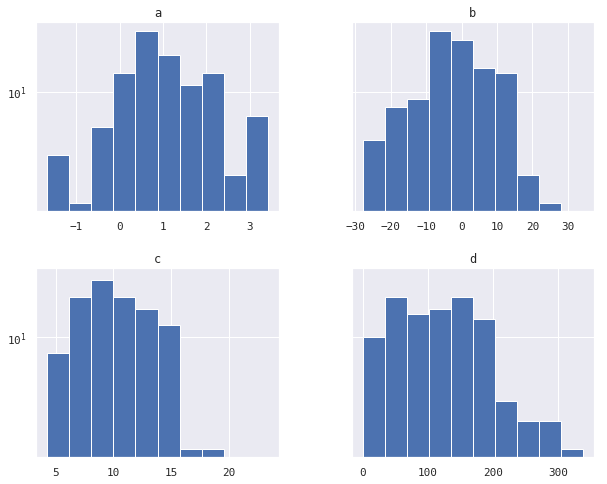

In [9]:
#####
df.hist(
    sharey=True,  # misma escala en el eje 'y'
    log=True  # escala log10
);  # finalizar con caracter ';' omite el texto de salida en los cuadernos jupyter
#####

## Series temporales (`line` con índice tipo `TimeSeries`)

Tipo de dato del índice: DatetimeIndex


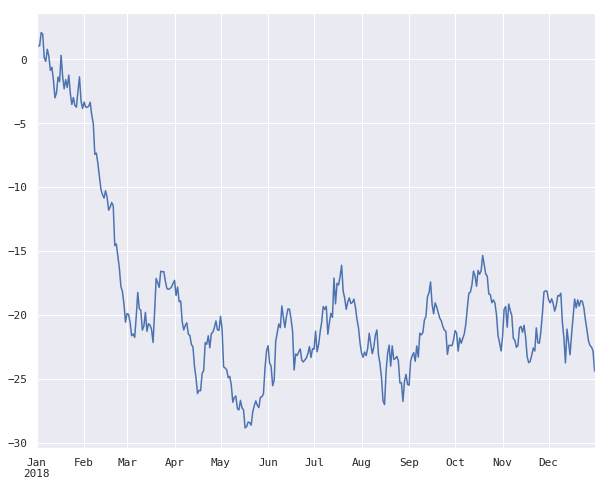

In [10]:
N = 365
np.random.seed(2983)  # reproducibilidad

# Crea datos
ts = pd.Series(np.random.randn(N),
               index=pd.date_range('1/1/2018', periods=N))
ts = ts.cumsum()

fig, ax = plt.subplots()  # igual que plt.subplots(1,1)

#####
ts.plot(ax=ax)  # dibuja sobre los ejes creados anteriormente
#####

ax.set_xlim((ts.index.min(), ts.index.max()));  # ajusta el eje 'x'

print(f'Tipo de dato del índice: {type(ts.index).__name__}')

## Boxplots

/home/fernandezjm/.virtualenvs/curso_python/lib/python3.7/site-packages/pandas/plotting/_core.py:2254: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


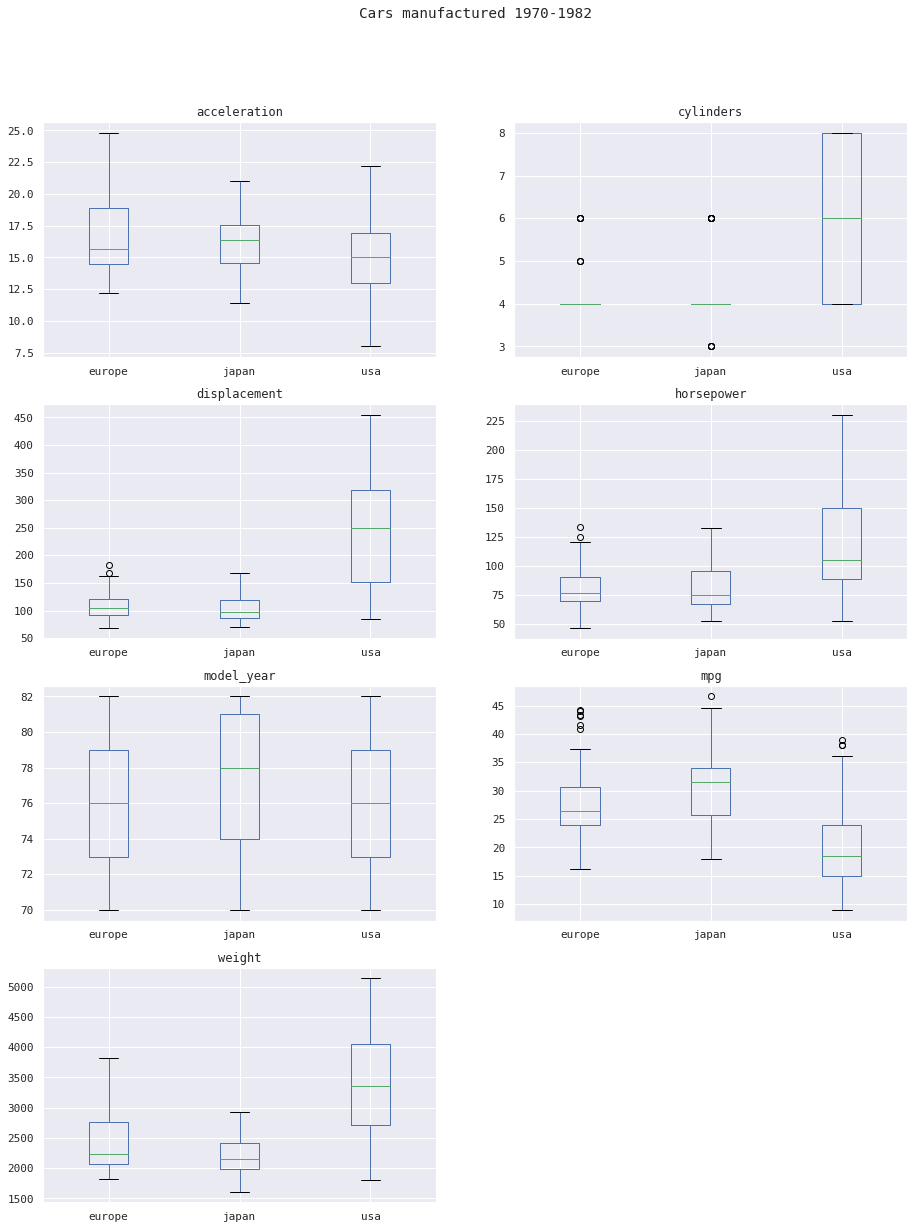

In [11]:
# Obtención de datos
df = sns.load_dataset('mpg')

# Crea una figura con 4 filas y 2 columnas y un tamaño de 15"x10"
fig, ax = plt.subplots(4, 2,
                       figsize=(15, 20))

# Número de subplots debe ser igual al número de variables (vamos a representar 7)
ax[-1, -1].axis('off')    # no dibujar el último
ax = ax.flatten()[:-1]  # eliminar el último de la lista

#####
df.boxplot(by='origin',  # dentro del dataframe, qué columna define el eje 'x'
           ax=ax, return_type=None)        # dónde dibujar (7 ejes creados anteriormente)
#####

fig.suptitle('Cars manufactured 1970-1982')  # título de la figura (completa)
_ = [_ax.set_xlabel('') for _ax in ax]  # omite etiqueta del eje 'x'


##### Probar resultado con la siguiente línea (dejando que pandas cree los 'Axes')
# df.boxplot(by='origin')

## Gráficos de área

In [12]:
# Obtención de datos
np.random.seed(0)  # reproducibilidad
N = 5
datos = pd.DataFrame({'Grupo A': np.random.randint(1, 20, N),
                      'Grupo B': np.random.randint(1, 20, N),
                      'Grupo C': np.random.randint(1, 20, N)},
                      index=range(1, N+1))

cmaps = [cmap for cmap in plt.colormaps() if not cmap.endswith("_r")]
cmaps.sort()

def plot_area(leyenda=True, apilado=True, transparencia=80, colores='Accent'):
    title = 'Gráfica de área ({0})'.format('apilado, por defecto' if apilado else 'sin apilar')
#####
    datos.plot.area(
        title=title,
        stacked=apilado,
        legend=leyenda,
        alpha=transparencia/100,
        cmap=colores
    )
#####
interact(plot_area, leyenda=True, apilado=True, transparencia=(0, 100), colores=cmaps);

interactive(children=(Checkbox(value=True, description='leyenda'), Checkbox(value=True, description='apilado')…

## Gráficos circulares (`pie`)

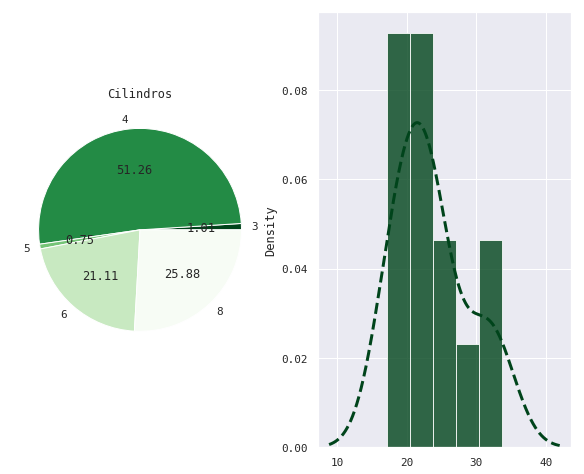

In [13]:
cmap = plt.cm.Greens_r  # paleta de colores

# Tratamiento de los datos
df1 = df.groupby(by='cylinders').count().name
df1.reset_index()

# Generamos subplots
ax = plt.subplot(121)

#####
ax = df1.plot.pie(
    cmap=cmap,         # mapa de colores (paleta)
    title='Cilindros', # título
    autopct='%.2f',    # formato del texto dentro de cada sector
    ax=ax              # dónde dibujar
)
#####

ax.set_ylabel('')  # omitimos etiqueta en el eje 'y'

ax = plt.subplot(122)
df2 = df.groupby('model_year').agg('mean').sort_values('weight')

df2.mpg.plot.hist(density=True, bins=5, alpha=.8, cmap=cmap, ax=ax)
df2.mpg.plot.kde(linewidth=3, style='--', cmap=cmap, ax=ax);

## Gráficos superpuestos con `pandas`

Para crear varios gráficos superpuestos, almacenaremos el eje (`ax`) donde dibujar

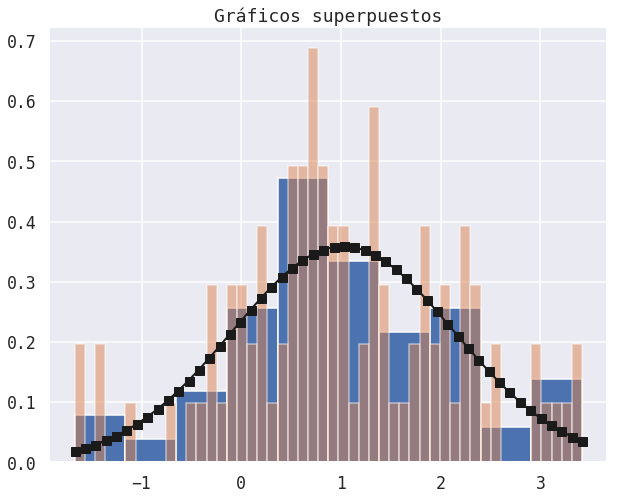

In [14]:
df = pd.DataFrame.from_dict(data)  # recuperamos dataframe anterior

with sns.plotting_context("talk", rc={"lines.linewidth": 2}):  # estilos (colores) para este gráfico

    bins = 50  # número de columnas en el histograma
    #####
    ax = df.hist('a', density=1)  # creado directamente, por defecto bins=10
    df.hist('a', bins=bins, density=1, alpha=.5, ax=ax)  # redibujamos sobre 'ax'
    #####

    x = np.linspace(
        df.a.min(),
        df.a.max(),
        bins
    )
    y = (1 / (np.sqrt(2 * np.pi) * df.a.std())) * \
        np.exp(-0.5 * (1 / df.a.std() * (x - df.a.mean()))**2)

    plt.plot(x, y, 'ks-');  # pyplot dibuja sobre el área de dibujo activo, de haberlo
    plt.title('Gráficos superpuestos');

# Datos incompletos (`NaN`)

In [38]:
import pandas as pd

URL_crypto = 'https://api.coinmarketcap.com/v1/ticker/'
cc = pd.read_json(URL_crypto) 
cc.set_index('id', inplace=True)
print('Número de datos ausentes, por columna')
cc.isnull().sum()

Número de datos ausentes, por columna


24h_volume_usd         0
available_supply       0
last_updated           0
market_cap_usd         0
max_supply            70
name                   0
percent_change_1h      0
percent_change_24h     0
percent_change_7d      0
price_btc              0
price_usd              0
rank                   0
symbol                 0
total_supply           0
dtype: int64

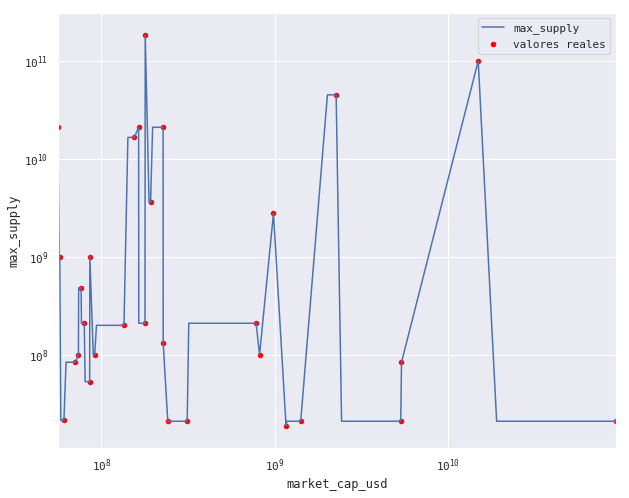

In [46]:
ax = cc.fillna(method='ffill').plot.line(x='market_cap_usd', y='max_supply', logx=True, logy=True)
cc.plot.scatter(x='market_cap_usd', y='max_supply', logx=True, logy=True,
                label='valores reales', c='red', ax=ax);

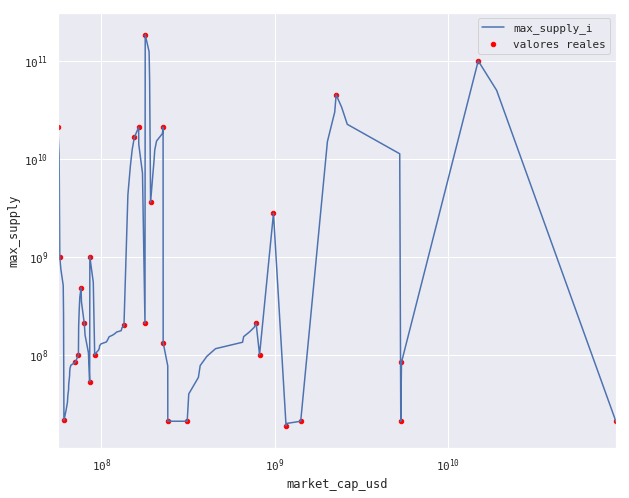

In [45]:
cc['market_cap_usd_i'] = cc.market_cap_usd.interpolate(method='polynomial', order=4)
cc['max_supply_i'] = cc.max_supply.interpolate(method='linear')

ax = cc.plot.line(x='market_cap_usd_i', y='max_supply_i', logx=True, logy=True)
cc.plot.scatter(x='market_cap_usd', y='max_supply', logx=True, logy=True,
                c='red', label='valores reales', ax=ax);
